# Woosley and Weaver core-collapse supernova yields 
The goal of this notebook is to examine the relationship between the mass ejected of a given isotope in a core-collapse supernova and the initial mass (in solar masses) of the exploded star.  The yields are those from [Woosley and Weaver (1995)](https://ui.adsabs.harvard.edu/abs/1995ApJS..101..181W/abstract).  Change the plot parameters as desired for your purposes.  Begin by restarting and rerunning all from the Kernel or Runtime menus or clicking on the double arrows.  Answer Run anyway if an authorship warning comes up.  Figures can be saved by right-clicking or control-clicking on the figure in the notebook.  If your current version gets corrupted, don't worry. Simply quit and download a new copy from GitHub, or start up a new version on Google Colab or Binder.

Begin by installing and importing the necessary python libraries

In [1]:
import sys, io, requests

!{sys.executable} -m pip install --quiet wnutils
!{sys.executable} -m pip install --quiet matplotlib

import matplotlib.pyplot as plt
import wnutils.xml as wx 

Read in the *Woosley and Weaver* data from [OSF](https://osf.io/62fuy/) and store in a wnutils XML object.

In [2]:
url = 'https://osf.io/bvwe2/download'

xml = wx.Xml(io.BytesIO((requests.get(url).content)))

Retrieve the data that contain properties relevant to this notebook such as initial mass of a star before explosion, total ejected mass, initial metallicity of a star, and the mass fractions of isotopes in the ejecta from the star upon explosion. 

In [3]:
zone_data=xml.get_zone_data()

Now choose an isotope to explore in the data.

In [4]:
isotope='si28'

Now use the wnutils package to obtain a tuple that contains the atomic number and mass number of the isotope.  Create the key for retrieving the isotope's data.

In [5]:
tup=xml.get_z_a_state_from_nuclide_name(isotope)
Id=(isotope,tup[0],tup[1])

Now store the data in a dictionary 'z' with the ejected mass of the isotope of interest at different solar masses for 7 different metallicities.  If you receive a *KeyError*, it means the isotope you selected is not included in the *Woosley and Weaver* data.

In [6]:
z = {}
for keys in zone_data:
    new_key=float(keys[2])
    if new_key not in z:
        z[new_key]={}
    z[new_key][keys[1]] = \
       float(zone_data[keys]['mass fractions'][Id])*float(zone_data[keys]['properties']['total ejected mass'])

Finally, plot the data.  Change the axis limits with the *plt.xlim()* and *plt.ylim()* commands.  The data are presented for different initial stellar metalliciies (scaled to Solar metallicity $Z_\odot$, according to the [Anders and Grevesse (1989)](https://ui.adsabs.harvard.edu/abs/1989GeCoA..53..197A/abstract) compilation).  The scaling on the ordinate can be *linear* or *log*. Isotopes with a weak dependence on initial stellar metallicity are *primary* isotopes, and the graph will probably display best with *linear* scaling.  Isotopes with a strong dependence on initial metallicity are *secondary* isotopes, and the graph will most likely show up best with *log* scaling.

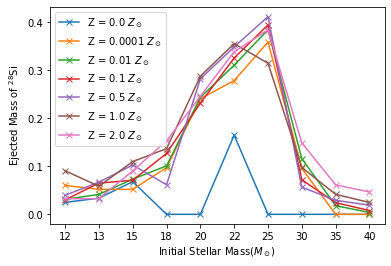

In [7]:
for keys in sorted(z.keys()):
    x=[]
    y=[]
    for i in sorted(z[keys].keys()):
        x.append(i)
        y.append(z[keys][i])
    plt.plot(x, y, 'x-', label = 'Z = ' + str(keys) + ' $Z_\\odot$' )

name = xml.get_latex_names([isotope])

plt.xlabel('Initial Stellar Mass($M_\\odot$)')
plt.ylabel('Ejected Mass of ' + name[isotope])
plt.yscale('linear')
#plt.ylim([1.e-10,1])

plt.legend()
plt.show()